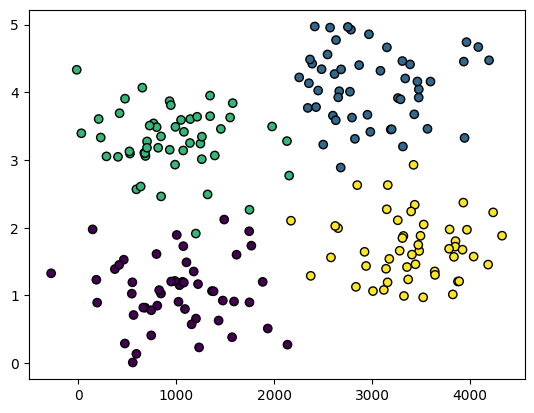

In [ ]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

blob_centers = ([1, 1], [3, 4], [1, 3.3], [3.5, 1.8])
X, y = make_blobs(n_samples=200,
                          centers=blob_centers,
                          cluster_std=0.5,
                          random_state=0)

X[:, 0] *= 1000

plt.scatter(X[:, 0], X[:, 1], c=y,  edgecolors='black',linewidth=1)

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
clf = MLPClassifier(hidden_layer_sizes=(6,),
                    random_state=1).fit(X, y)

print("Веса между входным и скрытым слоем:")
print(clf.coefs_[0])
print("\nВеса между скрытым и выходным слоем:")
print(clf.coefs_[1])

Веса между входным и скрытым слоем:
[[-0.09809877  0.33667051 -0.82024119 -0.29720839 -0.56852789 -0.66056109]
 [-0.58903611 -0.31219238 -0.22424296  0.11423652 -0.18324369  0.37321781]]

Веса между скрытым и выходным слоем:
[[-0.51316658 -0.43365467  0.43189995  0.68148414]
 [-0.24370005  0.34328608  0.57835494  0.57889271]
 [-0.59713359 -0.67678056 -0.46609801  0.54011704]
 [-0.5769702  -0.10221922  0.75476969  0.00610289]
 [ 0.34285864 -0.25645017  0.33417991  0.47281254]
 [-0.7006119   0.35515533  0.80295119  0.33880635]]


In [ ]:
for i in range(len(clf.coefs_)):
    number_neurons_in_layer = clf.coefs_[i].shape[1]
    for j in range(number_neurons_in_layer):
        weights = clf.coefs_[i][:,j]
        print(i, j, weights, end=", ")
        print()
    print()

0 0 [-0.09809877 -0.58903611], 
0 1 [ 0.33667051 -0.31219238], 
0 2 [-0.82024119 -0.22424296], 
0 3 [-0.29720839  0.11423652], 
0 4 [-0.56852789 -0.18324369], 
0 5 [-0.66056109  0.37321781], 

1 0 [-0.51316658 -0.24370005 -0.59713359 -0.5769702   0.34285864 -0.7006119 ], 
1 1 [-0.43365467  0.34328608 -0.67678056 -0.10221922 -0.25645017  0.35515533], 
1 2 [ 0.43189995  0.57835494 -0.46609801  0.75476969  0.33417991  0.80295119], 
1 3 [0.68148414 0.57889271 0.54011704 0.00610289 0.47281254 0.33880635], 



In [ ]:
print("Веса смещения для скрытого слоя:")
print(clf.intercepts_[0])
print("\nВеса смещения для выходного слоя:")
print(clf.intercepts_[1])



Веса смещения для скрытого слоя:
[-0.55752645  0.60978582 -0.8640854   0.33258994 -0.18652436  0.05696655]

Веса смещения для выходного слоя:
[-0.29413473  0.49414359 -0.60792984 -0.11888525]


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y, clf.predict(X))

array([[ 0,  0,  0, 50],
       [ 0,  0,  0, 50],
       [ 0,  0,  0, 50],
       [ 0,  0,  0, 50]])

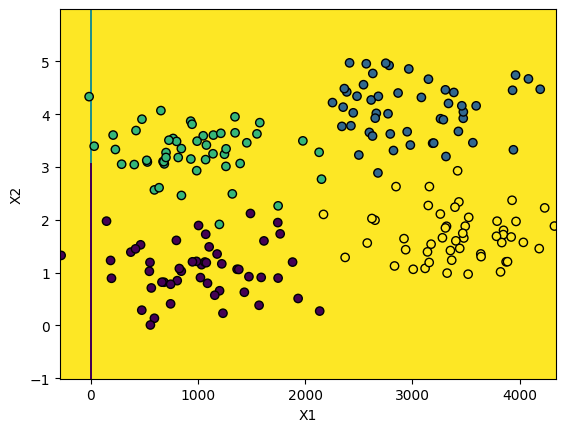

In [ ]:
import numpy as np
X0 = np.linspace(X[:, 0].min()-1,X[:, 0].max()+1, X.shape[0])
X1 = np.linspace(X[:, 1].min()-1,X[:, 1].max()+1, X.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X[:, 0], X[:, 1], c=y,  edgecolors='black',linewidth=1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
import sklearn

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = scaler.transform(X)

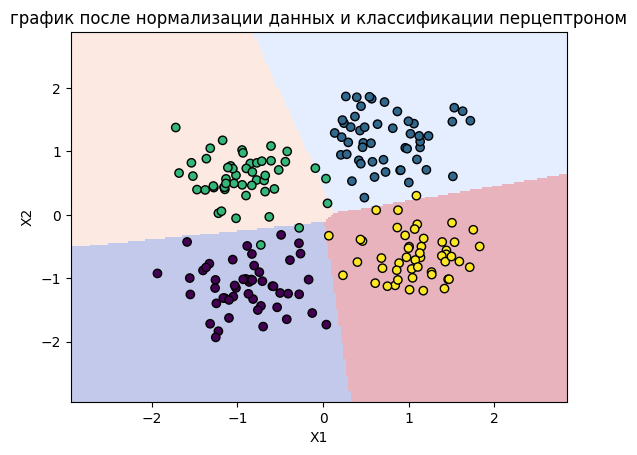

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
from sklearn.linear_model import Perceptron

blob_centers = ([1, 1], [3, 4], [1, 3.3], [3.5, 1.8])
X, y = make_blobs(n_samples=200, centers=blob_centers, cluster_std=0.5, random_state=0)

X[:, 0] *= 1000

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

clf = Perceptron(max_iter=1000, eta0=1, random_state=0)
clf.fit(X_scaled, y)

X0 = np.linspace(X_scaled[:, 0].min()-1, X_scaled[:, 0].max()+1, X_scaled.shape[0])
X1 = np.linspace(X_scaled[:, 1].min()-1, X_scaled[:, 1].max()+1, X_scaled.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf.predict(np.c_[X0_grid.ravel(), X1_grid.ravel()]).reshape(X0_grid.shape)

plt.pcolormesh(X0_grid, X1_grid, y_predict, cmap='coolwarm', alpha=0.3)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, edgecolors='black', linewidth=1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('график после нормализации данных и классификации перцептроном')
plt.show()


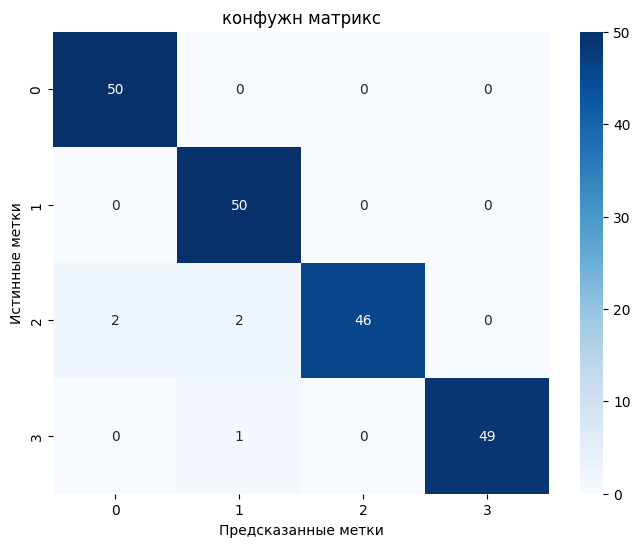

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_pred = clf.predict(X_scaled)
cm = confusion_matrix(y, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Предсказанные метки')
plt.ylabel('Истинные метки')
plt.title('конфужн матрикс')
plt.show()


задание 1

Точность с 1 нейронами: 0.8333
Точность с 2 нейронами: 0.3333
Точность с 10 нейронами: 1.0000
Точность с 100 нейронами: 1.0000


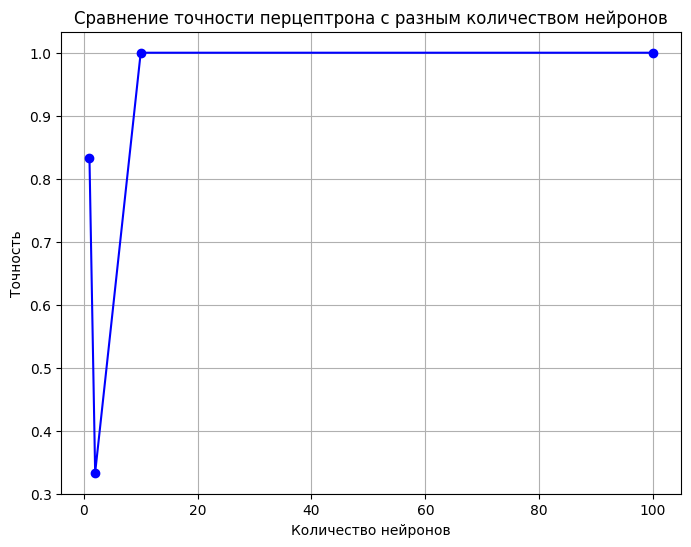

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=200, centers=3, random_state=42, cluster_std=1.5)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

neurons = [1, 2, 10, 100]
accuracies = []

for n in neurons:
    clf = MLPClassifier(hidden_layer_sizes=(n,), max_iter=1000, random_state=42)
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f'Точность с {n} нейронами: {accuracy:.4f}')

plt.figure(figsize=(8, 6))
plt.plot(neurons, accuracies, marker='o', linestyle='-', color='b')
plt.xlabel('Количество нейронов')
plt.ylabel('Точность')
plt.title('Сравнение точности перцептрона с разным количеством нейронов')
plt.grid(True)
plt.show()


задание 2

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=200, centers=3, random_state=42, cluster_std=1.5)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

hidden_layers = [(2, 10), (3, 10), (10, 10)]  #количество слоев, количество нейронов в каждом слое
accuracies = []

for layers in hidden_layers:
    clf = MLPClassifier(hidden_layer_sizes=layers, max_iter=1000, random_state=42)
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f'Точность с {layers[0]} скрытыми слоями и {layers[1]} нейронами в каждом слое: {accuracy:.4f}')




Точность с 2 скрытыми слоями и 10 нейронами в каждом слое: 0.9833


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Точность с 3 скрытыми слоями и 10 нейронами в каждом слое: 1.0000
Точность с 10 скрытыми слоями и 10 нейронами в каждом слое: 1.0000


задание 3

In [ ]:

deep_model = MLPClassifier(hidden_layer_sizes=(10,)*10, max_iter=1000, random_state=42)
deep_model.fit(X_train_scaled, y_train)

for i, (weights, biases) in enumerate(zip(deep_model.coefs_, deep_model.intercepts_)):
    print(f"Слой {i+1}:")
    print("Веса:")
    print(weights)
    print("Смещения:")
    print(biases)
    print("="*50)
print("Веса (первые 5 значений) слоя", i+1, ":", weights.flatten()[:5])
print("Смещения (первые 5 значений) слоя", i+1, ":", biases[:5])


Слой 1:
Веса:
[[-0.14045255  0.85219653  0.39146912  0.30822874 -0.5741499  -0.5629904
  -0.4917471   0.71335013  0.2410724   0.19368729]
 [-0.55535509  0.27616589  0.13633285 -0.47068405 -0.53831828 -0.64294619
  -0.15338386 -0.33126289 -0.31527641 -0.07428505]]
Смещения:
[ 0.39898448 -0.40539156 -0.36023376 -0.13046989  0.06341238  0.41180728
 -0.5730926   0.21469948  0.3136852  -0.66084087]
Слой 2:
Веса:
[[ 2.24582886e-01 -4.95358044e-02 -1.13751079e-01  4.93539514e-01
   4.95679525e-01  2.83183857e-01 -2.91819152e-01 -3.59335505e-01
   2.26558596e-01 -4.14514774e-01]
 [-2.96306877e-01 -1.30074062e-13 -1.35877219e-01  6.08749224e-01
  -8.43694345e-02  1.08765856e-01 -8.07430404e-02 -5.68337956e-02
   1.02938941e-01 -4.53213358e-01]
 [ 3.16612494e-01  2.58708755e-02  1.16952147e-01  3.99697899e-01
   2.10241217e-01  4.01398954e-01 -3.80612180e-01 -2.69604008e-01
  -4.04624330e-01 -1.79418461e-01]
 [ 5.91294988e-02 -1.19114193e-02  4.91654428e-02 -3.75175303e-01
  -4.03666507e-01 -9.0

задание 4

In [ ]:
import time
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = make_classification(n_samples=5000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#1 скрытый слой, 10 нейронов
start_time = time.time()
simple_model = MLPClassifier(hidden_layer_sizes=(10,), max_iter=500, random_state=42)
simple_model.fit(X_train_scaled, y_train)
simple_time = time.time() - start_time

#10 скрытых слоев, по 100 нейронов в каждом
start_time = time.time()
deep_model = MLPClassifier(hidden_layer_sizes=(100,)*10, max_iter=500, random_state=42)
deep_model.fit(X_train_scaled, y_train)
deep_time = time.time() - start_time

simple_acc = accuracy_score(y_test, simple_model.predict(X_test_scaled))
deep_acc = accuracy_score(y_test, deep_model.predict(X_test_scaled))

print(f"Простая модель: время обучения = {simple_time:.2f} сек, точность = {simple_acc:.4f}")
print(f"Глубокая модель: время обучения = {deep_time:.2f} сек, точность = {deep_acc:.4f}")


Простая модель: время обучения = 3.40 сек, точность = 0.8560
Глубокая модель: время обучения = 25.82 сек, точность = 0.8550


задание 5

Точность модели: 0.8889


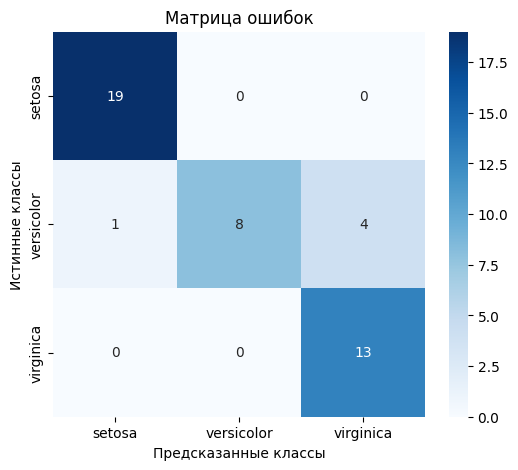

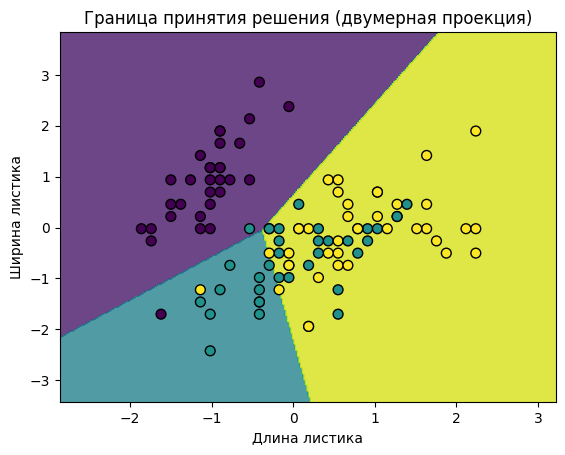

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
#датасет про ириски
data = load_iris()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

perceptron = Perceptron(max_iter=1000, random_state=42)
perceptron.fit(X_train_scaled, y_train)

y_pred = perceptron.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Точность модели: {accuracy:.4f}")

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.title('Матрица ошибок')
plt.xlabel('Предсказанные классы')
plt.ylabel('Истинные классы')
plt.show()

X_train_2d = X_train_scaled[:, :2]
X_test_2d = X_test_scaled[:, :2]

perceptron_2d = Perceptron(max_iter=1000, random_state=42)
perceptron_2d.fit(X_train_2d, y_train)

h = .02
x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = perceptron_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, edgecolors='k', marker='o', s=50, cmap='viridis')
plt.title('Граница принятия решения (двумерная проекция)')
plt.xlabel('Длина листика')
plt.ylabel('Ширина листика')
plt.show()


задание 6

Среднеквадратичная ошибка: 0.2924
R^2 (Коэффициент детерминации): 0.7769
Время обучения: 13.72 сек


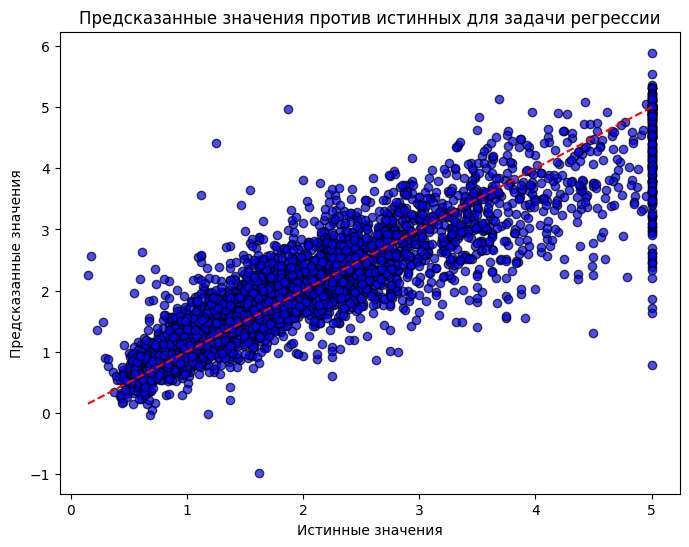

In [ ]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Загрузка датасета California housing
data = fetch_california_housing()
X, y = data.data, data.target

# Разбиение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Нормализация данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Создание модели MLPRegressor (перцептрон для регрессии)
start_time = time.time()
mlp_regressor = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
mlp_regressor.fit(X_train_scaled, y_train)
training_time = time.time() - start_time

# Предсказания модели
y_pred = mlp_regressor.predict(X_test_scaled)

# Оценка модели
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Вывод результатов
print(f"Среднеквадратичная ошибка: {mse:.4f}")
print(f"R^2 (Коэффициент детерминации): {r2:.4f}")
print(f"Время обучения: {training_time:.2f} сек")

# Визуализация предсказанных значений и истинных значений
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolors='black', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Истинные значения')
plt.ylabel('Предсказанные значения')
plt.title('Предсказанные значения против истинных для задачи регрессии')
plt.show()
